In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
from flow_analysis_comps.Fourier.OrientationSpaceManager import orientationSpaceManager
from util.video_io import read_video_metadata, load_tif_series_to_dask
from video_manipulation.segment_skel import segment_hyphae_general, skeletonize_segmented_im
import colorcet  # noqa: F401
from video_manipulation.control_class import videoControl

plt.close('all')

%matplotlib widget

%load_ext autoreload
%autoreload 2

In [ ]:
data_adr = Path(
    r"G:\AMOLF_Data\AMOLF-SHIMIZU Dropbox\Simon van Staalduine"
)  # Personal PC path
data_adr = Path(
    r"/Users/simonvanstaalduine/AMOLF-SHIMIZU Dropbox/Simon van Staalduine"
)  # Personal mac path
data_adr = Path(r"U:\test_data\20250122_Plate017")

plate_id = r"20250122_Plate017"
video_id = r"034"

total_path = data_adr / video_id / "Img"
info_path = total_path.parent / "videoInfo.txt"
# info_path = total_path / "videoInfo.json"

video_info = read_video_metadata(info_path)
array = load_tif_series_to_dask(total_path)  # Dims are z, y, x

{0: array([ 306, 1404]), 1: array([ 309, 1404]), 2: array([ 333, 1401]), 3: array([ 333, 1402]), 4: array([ 336, 1400]), 5: array([ 336, 1402]), 6: array([ 336, 1407]), 7: array([ 336, 1408]), 8: array([ 470, 1313]), 10: array([ 476, 1312]), 9: array([ 471, 1288]), 13: array([ 488, 1301]), 11: array([ 476, 1314]), 12: array([ 486, 1268]), 14: array([ 492, 1267]), 15: array([ 493, 1300]), 16: array([ 497, 1292]), 20: array([ 502, 1268]), 17: array([ 497, 1293]), 21: array([ 503, 1322]), 18: array([ 498, 1292]), 19: array([ 498, 1293]), 24: array([ 512, 1273]), 22: array([ 506, 1292]), 26: array([ 520, 1279]), 25: array([ 514, 1291]), 23: array([ 511, 1267]), 27: array([ 523, 1275]), 28: array([608, 948]), 29: array([609, 946]), 30: array([ 668, 1253]), 31: array([ 669, 1251]), 32: array([ 680, 2036]), 49: array([ 772, 1492]), 33: array([ 724, 1194]), 44: array([ 745, 1209]), 34: array([ 725, 1089]), 39: array([ 730, 1089]), 35: array([ 726, 1086]), 36: array([ 726, 1228]), 43: array([ 7

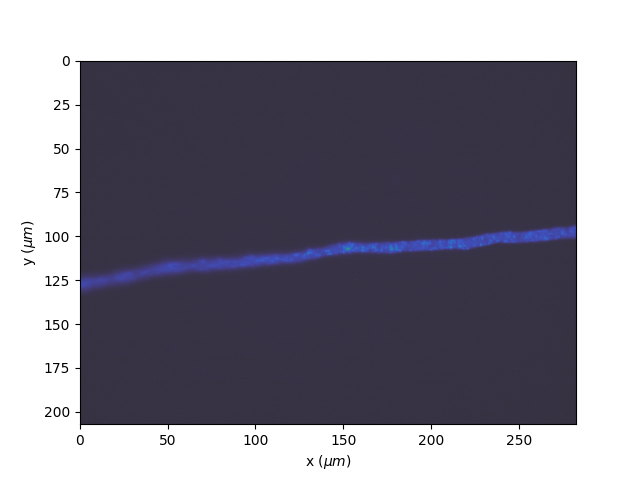

In [23]:
video_control_obj = videoControl(total_path, info_path)

video_control_obj.plot_edge_extraction()
print(video_control_obj.node_positions)

In [ ]:
line_height = 760
# Cutting out an image with (z,x) axes
img = array[:, line_height, 1000:1750].compute()

fig, ax = plt.subplots(1, 2, figsize=(9, 4))
ax[0].imshow(array[0, :, :], cmap="cet_CET_L20")
ax[0].axhline(line_height)

ax[1].imshow(img, cmap="cet_CET_L20")
ax[1].set_aspect("equal")
fig.tight_layout()

In [ ]:
OSFilter = orientationSpaceManager(0.15, K=12)
img_fft = OSFilter.get_response(img)

In [ ]:
order = 12

OSFilter.demo_image(img, order=order, thresh_method="otsu")

In [ ]:
point = (384, 80)

fig = OSFilter.response.plot_mean_response()
thres = OSFilter.response.nlms_mask(fill_holes=True, thresh_method="otsu")
OSFilter.response.plot_lineof_point(point)
OSFilter.response.visualize_point_response(point)

fig, ax = plt.subplots()
ax.imshow(thres)